# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Dhruv  | Vyas | Dhruv, 17/10/24 | Hours | 25% |
| Member 2: | Vedant | Raval | Vedant,16/10/24 | Hours | 25% |
| Member 3: | Madelin Madona| Ambrose Santhaseelan | Madelin,17/10/24 | Hours | 25% |
| Member 4: | Netra | Pandya | Netra, 16/10/24 | Hours | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

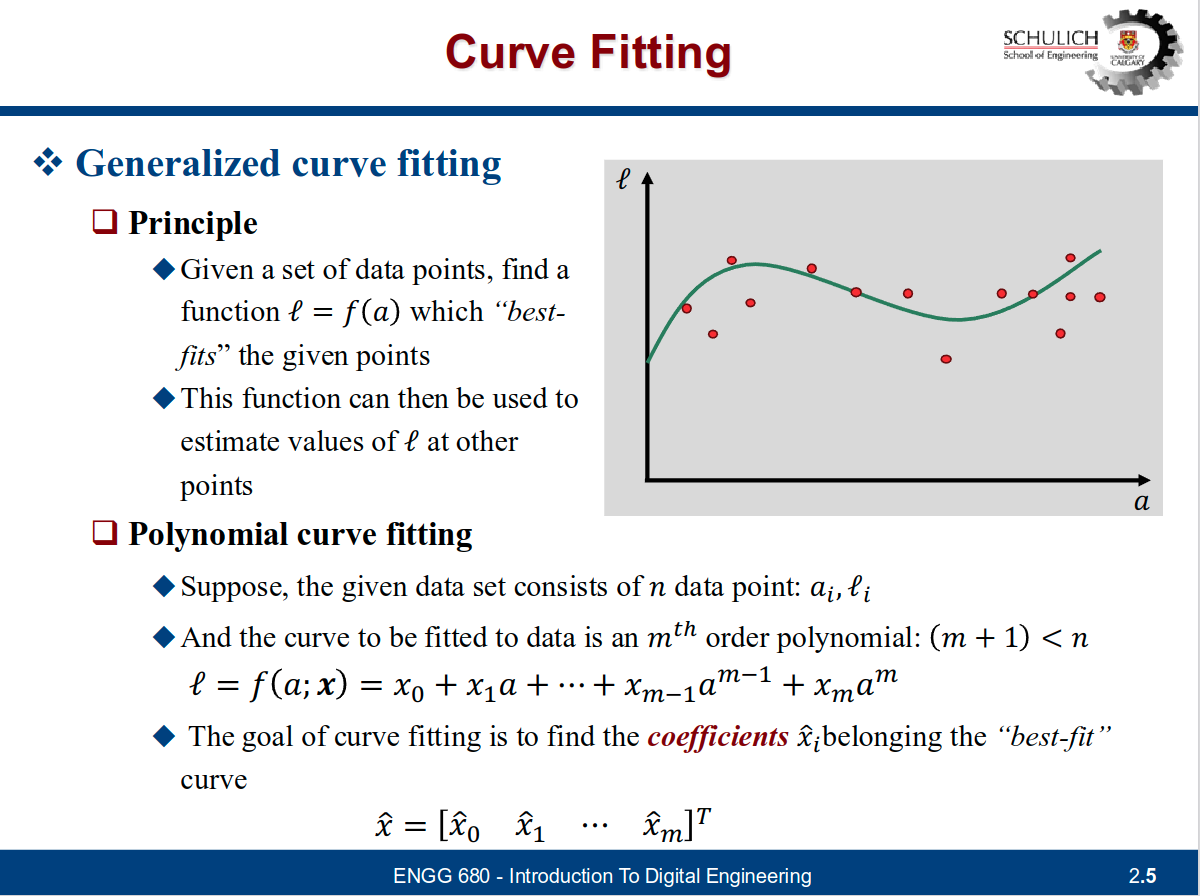

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('/content/data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]

In [3]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


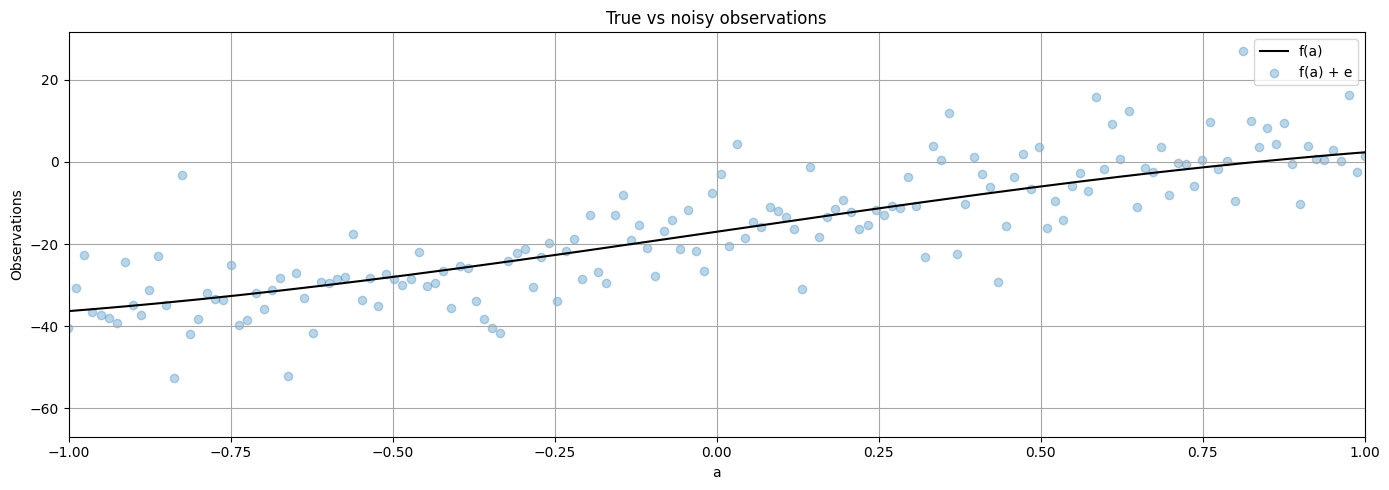

In [4]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

#for true observation
ax.plot(a, l_true, label="f(a)", color='k')
#for noisy observation
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)
# Naming axis labels
ax.set_xlabel("a")
ax.set_ylabel("Observations")
ax.set_title("True vs noisy observations")
# Adding legend
ax.legend()
#Scale range of x-axis
ax.set_xlim([-1,1])

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [5]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

import numpy as np
def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

#Create the Vandermonde matrix for polynomial fitting

    A = np.vander(a, deg + 1, increasing=True)

    # Calculate the pseudo-inverse of the weighted Vandermonde matrix
    A_t = np.transpose(A)
    P_inv = np.linalg.inv(P)
    At_Pinv_A = np.dot(np.dot(A_t, P_inv), A)
    At_Pinv_l = np.dot(np.dot(A_t, P_inv), l)

    # Compute the coefficients of the polynomial (x)
    x = np.linalg.solve(At_Pinv_A, At_Pinv_l)

    # Calculate the covariance matrix (cov_x)
    cov_x = np.linalg.inv(At_Pinv_A)

    # Generate polynomial fit values
    l_fit = np.dot(A, x)

    # Calculate observation residuals (v)
    v = l - l_fit

    # Calculate a posteriori variance factor (apv)
    n = len(a)
    apv = (v.T @ P_inv @ v) / (n - (deg + 1))

    return x, cov_x, apv, v

# Example usage
degree = 3  # Define the degree of the polynomial
coefficients, cov_x, apv, residuals = fit_polynomial_curve(a, l, P, degree)

print("Estimated polynomial coefficients:",cov_x)
print("Uncertainty in estimated coefficients (cov_x):", cov_x)
print("A posteriori variance factor (apv):", apv)
print("Observation residuals (v):", residuals)

Estimated polynomial coefficients: [[ 4.50003000e-03  1.89485110e-18 -7.56884392e-04 -2.58078939e-19]
 [ 1.89485110e-18  3.78448251e-03 -3.30122210e-19 -5.34690226e-04]
 [-7.56884392e-04 -3.30122210e-19  2.29146843e-04  4.76862614e-20]
 [-2.58078939e-19 -5.34690226e-04  4.76862614e-20  8.99324418e-05]]
Uncertainty in estimated coefficients (cov_x): [[ 4.50003000e-03  1.89485110e-18 -7.56884392e-04 -2.58078939e-19]
 [ 1.89485110e-18  3.78448251e-03 -3.30122210e-19 -5.34690226e-04]
 [-7.56884392e-04 -3.30122210e-19  2.29146843e-04  4.76862614e-20]
 [-2.58078939e-19 -5.34690226e-04  4.76862614e-20  8.99324418e-05]]
A posteriori variance factor (apv): 66.13227783131883
Observation residuals (v): [-2.74320068e+00 -1.95519951e+00 -2.41866060e+01 -7.47447072e-01
 -3.82313043e+00  8.71116077e-01  1.03813848e+00  1.09647003e-01
 -1.03022642e-02 -1.49606308e+01  2.46703376e+00 -6.10827396e+00
  4.50610228e+00  4.05582337e+00 -6.45250372e+00  8.09514350e+00
 -2.31956359e+00 -7.69472240e+00  2.227

Degree 1:
Estimated polynomial coefficients: [-16.59352348   7.25633807]
Uncertainty in estimated coefficients (cov_x): [[2.00000000e-03 2.06512225e-19]
 [2.06512225e-19 6.05500247e-04]]
A posteriori variance factor (apv): 162.742608604322
Observation residuals (v): [ 2.31950929e+01  2.33624696e+01  5.16650752e-01  2.33475847e+01
  1.96698387e+01  2.37681600e+01  2.33453696e+01  2.18331528e+01
  2.11355408e+01  5.61358715e+00  2.24756392e+01  1.33407067e+01
  2.34014210e+01  2.24034178e+01  1.13532794e+01  2.53650032e+01
  1.44202357e+01  8.52085442e+00  1.79247562e+01  2.11851700e+00
  1.46072683e+01  9.70673172e+00  1.30817824e+01  1.63166651e+01
  1.15688083e+01  1.16383392e+01  6.07754648e+00  3.24693889e+01
  1.42879391e+01  1.41679638e+01  1.73166729e+01  7.83535648e+00
  1.73215977e+01  1.35522578e+01 -5.87401633e+00 -2.04342770e+00
  8.45600371e+00 -7.17469845e+00  7.13670400e+00  4.93927812e+00
  7.53688443e+00  1.29373203e+01  6.55314295e+00  5.69877998e+00
  1.01514943e+01  

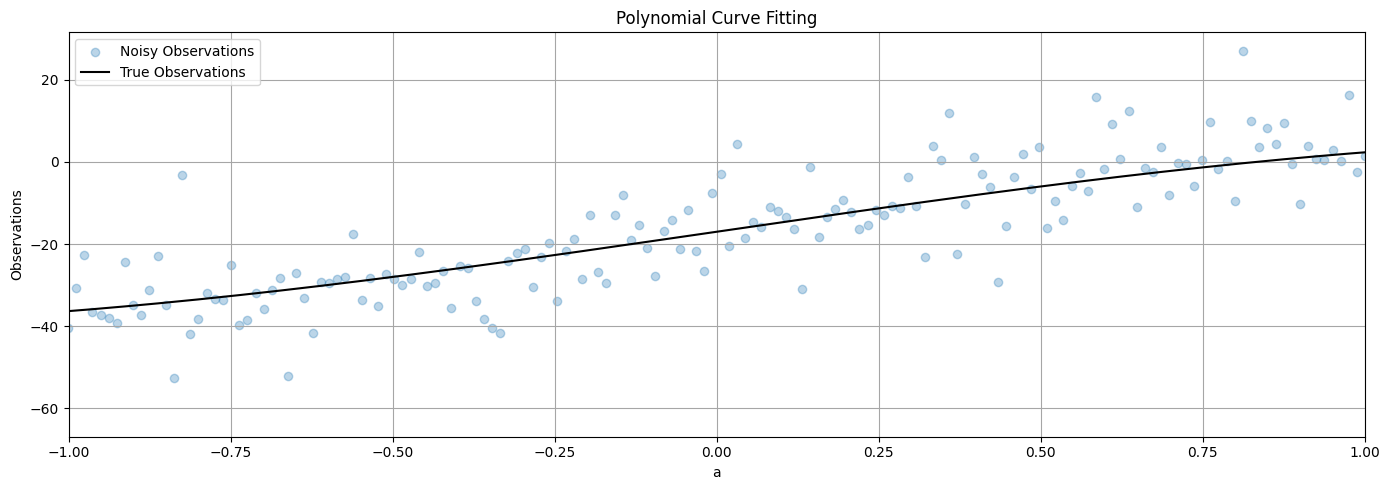

In [6]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
import matplotlib.pyplot as plt

def fit_and_plot(degree):
    coefficients, cov_x, apv, residuals = fit_polynomial_curve(a, l, P, degree)
    print(f"Degree {degree}:\nEstimated polynomial coefficients: {coefficients}")
    print(f"Uncertainty in estimated coefficients (cov_x): {cov_x}")
    print(f"A posteriori variance factor (apv): {apv}")
    print(f"Observation residuals (v): {residuals}\n")

# Defining the degerees to be fit
degrees = [1, 3, 5]

plt.figure(figsize=(14, 5))
plt.scatter(a, l, label='Noisy Observations', color='tab:blue', marker='o', alpha=0.3)
plt.plot(a, l_true, label='True Observations', color='k')

for degree in degrees:
    fit_and_plot(degree)

# Adding labels, legend, and title
plt.xlabel('a')
plt.ylabel('Observations')
plt.title('Polynomial Curve Fitting')
plt.legend()
plt.xlim([-1, 1])
plt.grid(True, which='both', ls='-', color='0.65')
plt.tight_layout()
plt.show()




In [7]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

coefficients_1, _, _, _ = fit_polynomial_curve(a, l, P, 1)
coefficients_3, _, _, _ = fit_polynomial_curve(a, l, P, 3)
coefficients_5, _, _, _ = fit_polynomial_curve(a, l, P, 5)
# Construct polynomial functions for each degree using np.polyval
line_uw = np.polyval(coefficients_1[::-1], a)
cubic_uw = np.polyval(coefficients_3[::-1], a)
quintic_uw = np.polyval(coefficients_5[::-1], a)

# Print the results to verify
print("Line Polynomial (Degree 1):", line_uw)
print("Cubic Polynomial (Degree 3):", cubic_uw)
print("Quintic Polynomial (Degree 5):", quintic_uw)

Line Polynomial (Degree 1): [-3.93899819e+01 -3.92986133e+01 -3.92072447e+01 -3.91158761e+01
 -3.90245076e+01 -3.89331390e+01 -3.88417704e+01 -3.87504019e+01
 -3.86590333e+01 -3.85676647e+01 -3.84762962e+01 -3.83849276e+01
 -3.82935590e+01 -3.82021904e+01 -3.81108219e+01 -3.80194533e+01
 -3.79280847e+01 -3.78367162e+01 -3.77453476e+01 -3.76539790e+01
 -3.75626104e+01 -3.74712419e+01 -3.73798733e+01 -3.72885047e+01
 -3.71971362e+01 -3.71057676e+01 -3.70143990e+01 -3.69230305e+01
 -3.68316619e+01 -3.67402933e+01 -3.66489247e+01 -3.65575562e+01
 -3.64661876e+01 -3.63748190e+01 -3.62834505e+01 -3.61920819e+01
 -3.61007133e+01 -3.60093447e+01 -3.59179762e+01 -3.58266076e+01
 -3.57352390e+01 -3.56438705e+01 -3.55525019e+01 -3.54611333e+01
 -3.53697648e+01 -3.52783962e+01 -3.51870276e+01 -3.50956590e+01
 -3.50042905e+01 -3.49129219e+01 -3.48215533e+01 -3.47301848e+01
 -3.46388162e+01 -3.45474476e+01 -3.44560790e+01 -3.43647105e+01
 -3.42733419e+01 -3.41819733e+01 -3.40906048e+01 -3.39992362e+

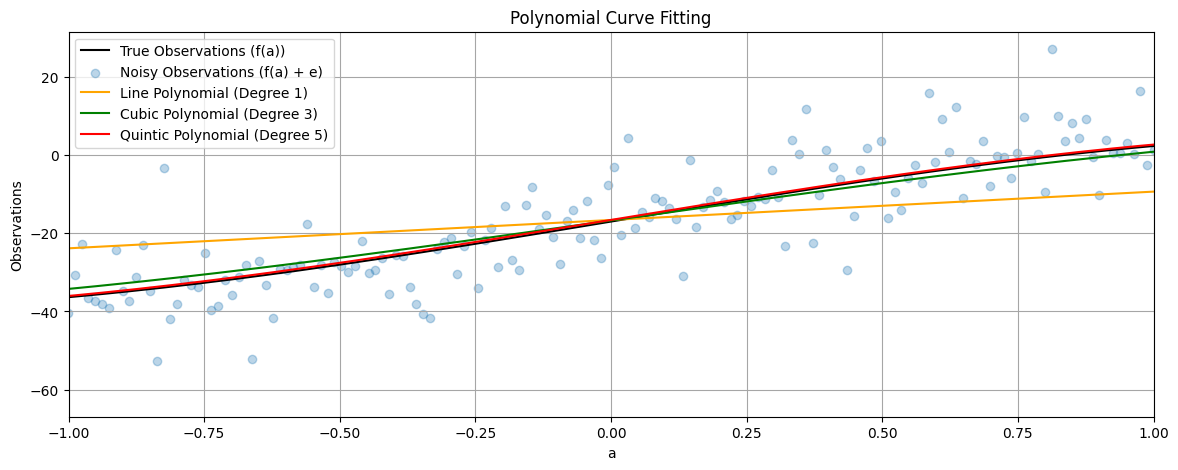

In [8]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.plot(a, l_true, label='True Observations (f(a))', color='k')
ax.scatter(a, l, label='Noisy Observations (f(a) + e)', color='tab:blue', marker='o', alpha=0.3)
ax.plot(a, line_uw, label='Line Polynomial (Degree 1)', color='orange')
ax.plot(a, cubic_uw, label='Cubic Polynomial (Degree 3)', color='green')
ax.plot(a, quintic_uw, label='Quintic Polynomial (Degree 5)', color='red')
# Add labels, legend, and title
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('Polynomial Curve Fitting')
ax.set_xlim(-1, 1)
ax.legend()
#Add grid
ax.grid(True, which='both',ls='-',color='0.65')
plt.show()
fig.tight_layout()

In [9]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
_, _, apv_1, _ = fit_polynomial_curve(a,l, P, 1)
_, _, apv_3, _ = fit_polynomial_curve(a,l, P, 3)
_, _, apv_5, _ = fit_polynomial_curve(a,l, P, 5)
print(f"A Posteriori Variance Factor for Degree 1 Polynomial: {apv_1}")
print(f"A Posteriori Variance Factor for Degree 3 Polynomial: {apv_3}")
print(f"A Posteriori Variance Factor for Degree 5 Polynomial: {apv_5}")


A Posteriori Variance Factor for Degree 1 Polynomial: 162.742608604322
A Posteriori Variance Factor for Degree 3 Polynomial: 66.13227783131883
A Posteriori Variance Factor for Degree 5 Polynomial: 63.7583446301842


In [10]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
norm_line = np.linalg.norm(line_uw - l_true)
norm_cubic = np.linalg.norm(cubic_uw - l_true)
norm_quintic = np.linalg.norm(quintic_uw - l_true)

# Print the results
print(f"Norm between Line Polynomial and True Observations: {norm_line}")
print(f"Norm between Cubic Polynomial and True Observations: {norm_cubic}")
print(f"Norm between Quintic Polynomial and True Observations: {norm_quintic}")

Norm between Line Polynomial and True Observations: 229.0601679674409
Norm between Cubic Polynomial and True Observations: 38.285979929116664
Norm between Quintic Polynomial and True Observations: 17.369967196966478


In [11]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# Overall, the trend indicates that both the APV and the norm drop with increasing polynomial degree, suggesting a better fit to the data.
# Lower APV and norm values result from higher-degree polynomials' superior ability to capture the subtleties in the data, giving a more accurate depiction of the
# actual observations.With really high-degree polynomials, however, one must also be cautious about overfitting, in which case the model may match the noise instead
# of the underlying pattern in the data.


In [12]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(l_var)

Line Polynomial (Degree 1): [-4.06678258e+01 -4.05711410e+01 -4.04744562e+01 -4.03777713e+01
 -4.02810865e+01 -4.01844017e+01 -4.00877169e+01 -3.99910320e+01
 -3.98943472e+01 -3.97976624e+01 -3.97009776e+01 -3.96042927e+01
 -3.95076079e+01 -3.94109231e+01 -3.93142382e+01 -3.92175534e+01
 -3.91208686e+01 -3.90241838e+01 -3.89274989e+01 -3.88308141e+01
 -3.87341293e+01 -3.86374445e+01 -3.85407596e+01 -3.84440748e+01
 -3.83473900e+01 -3.82507052e+01 -3.81540203e+01 -3.80573355e+01
 -3.79606507e+01 -3.78639658e+01 -3.77672810e+01 -3.76705962e+01
 -3.75739114e+01 -3.74772265e+01 -3.73805417e+01 -3.72838569e+01
 -3.71871721e+01 -3.70904872e+01 -3.69938024e+01 -3.68971176e+01
 -3.68004328e+01 -3.67037479e+01 -3.66070631e+01 -3.65103783e+01
 -3.64136934e+01 -3.63170086e+01 -3.62203238e+01 -3.61236390e+01
 -3.60269541e+01 -3.59302693e+01 -3.58335845e+01 -3.57368997e+01
 -3.56402148e+01 -3.55435300e+01 -3.54468452e+01 -3.53501604e+01
 -3.52534755e+01 -3.51567907e+01 -3.50601059e+01 -3.49634210e+

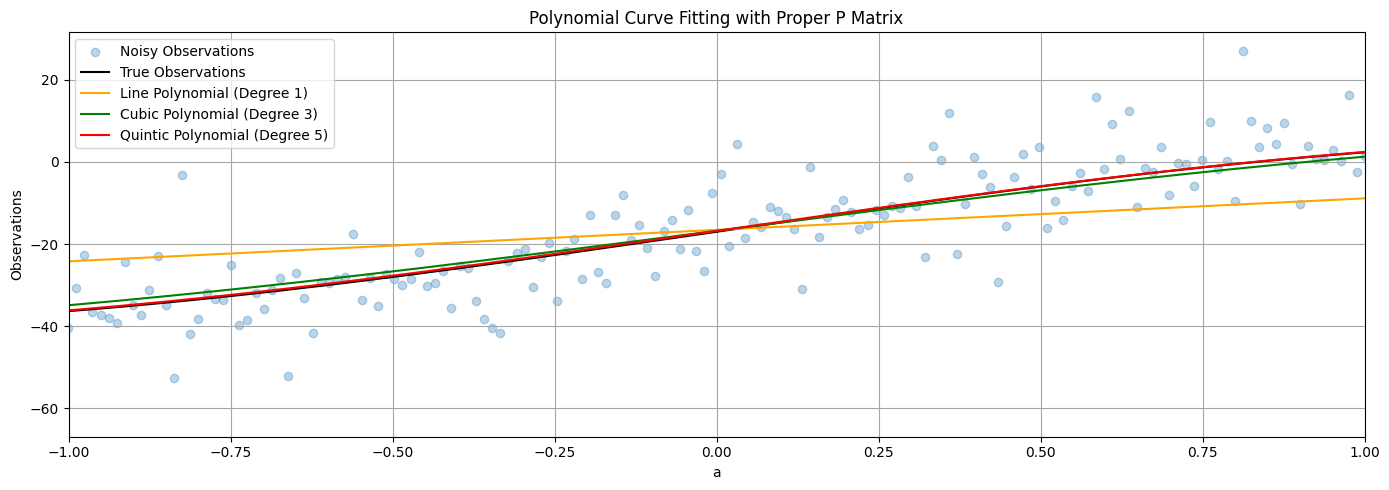

A Posteriori Variance Factor for Degree 1 Polynomial: 12.054651233436907
A Posteriori Variance Factor for Degree 3 Polynomial: 1.1444647026537131
A Posteriori Variance Factor for Degree 5 Polynomial: 0.9447009043856552
Norm between Line Polynomial and True Observations: 230.67760813832942
Norm between Cubic Polynomial and True Observations: 36.07026687266801
Norm between Quintic Polynomial and True Observations: 5.7416069158864955


In [14]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# Function to fit polynomial curves and calculate APV
def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    A = np.vander(a, deg + 1, increasing=True)
    A_t = np.transpose(A)
    P_inv = np.linalg.inv(P)
    At_Pinv_A = np.dot(np.dot(A_t, P_inv), A)
    At_Pinv_l = np.dot(np.dot(A_t, P_inv), l)
    x = np.linalg.solve(At_Pinv_A, At_Pinv_l)
    cov_x = np.linalg.inv(At_Pinv_A)
    l_fit = np.dot(A, x)
    v = l - l_fit
    n = len(a)
    apv = (v.T @ P_inv @ v) / (n - (deg + 1))
    return x, cov_x, apv, v

# Fit polynomial curves for degrees 1, 3, and 5
coefficients_dict = {}
apv_dict = {}
degrees = [1, 3, 5]
for degree in degrees:
    coefficients, cov_x, apv, residuals = fit_polynomial_curve(a, l, P, degree)
    coefficients_dict[degree] = coefficients
    apv_dict[degree] = apv

# Construct polynomial functions for each degree
line_uw = np.polyval(coefficients_dict[1][::-1], a)
cubic_uw = np.polyval(coefficients_dict[3][::-1], a)
quintic_uw = np.polyval(coefficients_dict[5][::-1], a)

# Print the polynomial values to verify
print("Line Polynomial (Degree 1):", line_uw)
print("Cubic Polynomial (Degree 3):", cubic_uw)
print("Quintic Polynomial (Degree 5):", quintic_uw)

# Plot the polynomial functions
plt.figure(figsize=(14, 5))
plt.scatter(a, l, label='Noisy Observations', color='tab:blue', marker='o', alpha=0.3)
plt.plot(a, l_true, label='True Observations', color='k')
plt.plot(a, line_uw, label='Line Polynomial (Degree 1)', color='orange')
plt.plot(a, cubic_uw, label='Cubic Polynomial (Degree 3)', color='green')
plt.plot(a, quintic_uw, label='Quintic Polynomial (Degree 5)', color='red')

# Add labels, legend, and title
plt.xlabel('a')
plt.ylabel('Observations')
plt.title('Polynomial Curve Fitting with Proper P Matrix')
plt.legend()
plt.xlim([-1, 1])
plt.grid(True, which='both', ls='-', color='0.65')
plt.tight_layout()
plt.show()

# Print the APV for each polynomial function
print(f"A Posteriori Variance Factor for Degree 1 Polynomial: {apv_dict[1]}")
print(f"A Posteriori Variance Factor for Degree 3 Polynomial: {apv_dict[3]}")
print(f"A Posteriori Variance Factor for Degree 5 Polynomial: {apv_dict[5]}")

norm_line = np.linalg.norm(line_uw - l_true)
norm_cubic = np.linalg.norm(cubic_uw - l_true)
norm_quintic = np.linalg.norm(quintic_uw - l_true)

# Print the results
print(f"Norm between Line Polynomial and True Observations: {norm_line}")
print(f"Norm between Cubic Polynomial and True Observations: {norm_cubic}")
print(f"Norm between Quintic Polynomial and True Observations: {norm_quintic}")

In [15]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
#The weighted LSE's method of accounting for data quality is the main cause of these problems. The model modifies the weight of each data point according
# to its dependability by adding the variance of each observation to the weighting matrix P. Prediction accuracy and dependability
# are increased since the resulting polynomial fit is more closely aligned with the genuine underlying trend thanks to this targeted weighting.
#This comparison demonstrates the advantages of employing weighted LSE over unweighted LSE, particularly in datasets with varied levels of noise and reliability.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

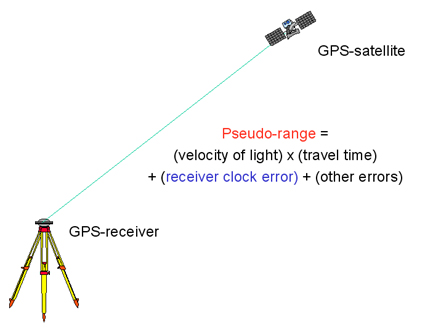

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [16]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange =pd.read_excel("/content/pseudoranges.xlsx")
df_sat_pos =pd.read_excel("/content/satellite_position.xlsx")

pseudorange=df_pseudorange.to_numpy()
sat_pos =df_sat_pos.to_numpy()

In [17]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m =4# 3 coordinates (x, y, z) + 1 clock bias (cdT)

In [18]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
variance = 1
P =np.diag(np.full(n, 1 / variance))

In [23]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [20]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [21]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0 #starts a loop correctly by setting the iteration counter to zero.
arr_w = [] #creates a blank list to hold weights that will be utilized later in the algorithm or loop.
arr_delta = [] #After every iteration, an empty list is initialized to hold the delta corrections.
arr_err_pos = [] #creates a blank list at the beginning of each loop to hold position mistakes.
arr_i = []  #creates a blank list to hold iteration numbers, which may be helpful for debugging or progress monitoring.
x_hat = x_0.copy()

In [43]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
import numpy as np
import pandas as pd

def euclidean_norm(receiver_pos, satellite_pos):
    """
    Compute the geometric distances between satellites and receiver.

    Args:
    receiver_pos (np.ndarray): The 3D coordinates of the receiver (x_r, y_r, z_r).
    satellite_pos (np.ndarray): The 3D coordinates of the satellites (each row is x_s, y_s, z_s).

    Returns:
    np.ndarray: An array of distances between satellites and receiver.
    """
    # Determine how each satellite position differs from the receiver position.
    differences = satellite_pos - receiver_pos  # This will broadcast row-by-row subtraction.
    # Determine each satellite's Euclidean distance.
    distances = np.linalg.norm(differences, axis=1)  # axis=1 for calculating the row-wise norm
    return distances

# Convert the DataFrame to a NumPy array, assuming that the satellite positions are in the first three columns.
satellite_pos = satellite_df.iloc[:, :3].to_numpy()

# Specify the position of the receiver (substitute real values).
receiver_pos = np.array([-1633489.37967725, -3651627.18250363, 4952481.61954918])

# Determine the separations between each satellite and the receiver.
distances = euclidean_norm(receiver_pos, satellite_pos)

# Print the result
print("Distances between satellites and receiver:\n", distances)



Distances between satellites and receiver:
 [31778907.87343488 26162211.64338617 30172506.44209725 12558720.14000551
 29072284.79804634 11486668.56318926 21359642.12077169 20648366.5478712
 19875237.00966888 14290524.89137949 19303757.42316194]


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  #...
  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while (#convergence criteria):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = #...

       # compute the design matrix A
       # (1 marks)
       A = #...

       # compute the misclosure array w
       # (1 marks)
       w = #...

       # compute the corrections delta
       # (1 marks)
       delta = #...

       # update the states
       # (1 marks)
       x_hat = #...


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = #...


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w #...
       arr_delta #...
       arr_err_pos #...
       arr_i #...




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = #...

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = #...




In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)



In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
